In [9]:
!pip install fredapi > null


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


In [7]:
fred_key = '42123b6d2f54c162c85ddecc8f077c78'

# 1. Create the fred object

In [9]:
fred = Fred(api_key = fred_key)

# 2. Search Fred for economic data

In [11]:
fred.search('S&P', limit = 1005)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2024-12-02,2024-12-02,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2024-12-02,2024-12-02,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-11-26 08:12:04-06:00,78,"For more information regarding the index, plea..."
SP500,SP500,2024-12-02,2024-12-02,S&P 500,2014-12-01,2024-11-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-29 19:11:37-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2024-12-02,2024-12-02,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-11-26 08:12:06-06:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2024-12-02,2024-12-02,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-09-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-11-26 08:12:28-06:00,33,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M1425BUSM027NNBR,M1425BUSM027NNBR,2024-12-02,2024-12-02,Currency Held by the Public for United States,1947-01-01,1968-05-01,Monthly,M,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2012-08-20 08:31:49-05:00,1,"Source: Federal Reserve Board, Data For 1947-1..."
Q07026DEQ421NNBR,Q07026DEQ421NNBR,2024-12-02,2024-12-02,Value of Exports for Germany,1892-01-01,1914-04-01,Quarterly,Q,Millions of Marks,Mil. Of Marks,Not Seasonally Adjusted,NSA,2012-08-17 14:02:56-05:00,1,This Series Excludes Precious Metal Beginning ...
QCOPAM770A,QCOPAM770A,2024-12-02,2024-12-02,"Total Credit to Private Non-Financial Sector, ...",1996-10-01,2024-01-01,"Quarterly, End of Quarter",Q,Percentage of GDP,Percentage of GDP,Not Seasonally Adjusted,NSA,2024-09-16 13:04:15-05:00,0,"Credit is provided by domestic banks, all othe..."


In [13]:
sp_search = fred.search('S&P', order_by='popularity')

In [15]:
sp_search.shape

(1000, 15)

In [19]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-09,2024-11-09,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:26:20-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-09,2024-11-09,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-09,2024-11-09,S&P 500,2014-11-10,2024-11-08,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-08 19:12:10-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-11-09,2024-11-09,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:26:23-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-11-09,2024-11-09,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-11-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-08 08:33:02-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-11-09,2024-11-09,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-11-09,2024-11-09,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2024-11-09,2024-11-09,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


# Pull raw data and plot

In [17]:
sp500 = fred.get_series(series_id='SP500')

<Axes: >

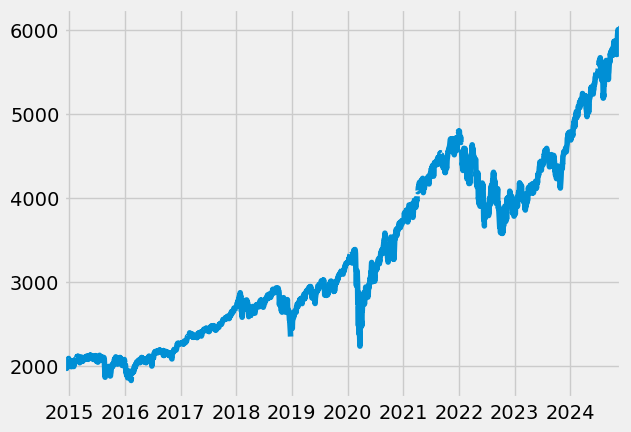

In [19]:
sp500.plot()

In [21]:
sp500

2014-12-01    2053.44
2014-12-02    2066.55
2014-12-03    2074.33
2014-12-04    2071.92
2014-12-05    2075.37
               ...   
2024-11-25    5987.37
2024-11-26    6021.63
2024-11-27    5998.74
2024-11-28        NaN
2024-11-29    6032.38
Length: 2610, dtype: float64

<Axes: title={'center': 'S&P 500'}>

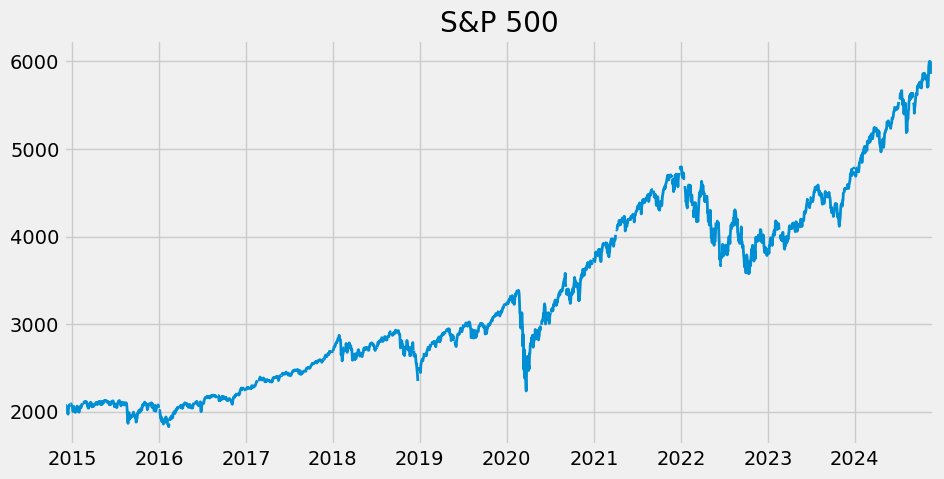

In [25]:
sp500.plot(figsize=(10,5),title = 'S&P 500', lw = 2)

In [ ]:
# 4. 